In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import random as rand

In [2]:
def weight_generator(n):
    lstw=[]
    for i in range(10000):
        w1=rand.uniform(0,1)
        w2=1-w1
        lstw.append(w2)
    return lstw

In [3]:
arr=weight_generator(2)

In [4]:
w2_mean=np.mean(arr)
w2_mean

0.5015852738921448

In [5]:
def weight_generator(n):
    lstw=[]
    for i in range(20):
        w1=rand.uniform(0,1)
        lstw.append(w1)
    return lstw

In [6]:
arr=weight_generator(2)
w1_mean=np.mean(arr)
w1_mean

0.5018271568818041

In [7]:
def weight_generator():
    lstw3=[]
    lstw2=[]
    lstw1=[]
    lstw4=[]
    temp=0
    for i in range(10000):
        temp=0
        w1=rand.uniform(0,1-temp)
        lstw1.append(w1)
        temp=temp+w1
        w2=rand.uniform(0,1-temp)
        lstw2.append(w2)
        temp=temp+w2
        w3=rand.uniform(0,1-temp)
        lstw3.append(w3)
        temp=temp+w3
        w4=1-temp
        lstw4.append(w4)

    return lstw1,lstw2,lstw3,lstw4

In [8]:
arr1,arr2,arr3,arr4=weight_generator()
w1_mean=np.mean(arr1)
w2_mean=np.mean(arr2)
w3_mean=np.mean(arr3)
w4_mean=np.mean(arr4)
print(w1_mean,w2_mean,w3_mean,w4_mean)

0.503996739559246 0.24821123573713558 0.12396817743731559 0.12382384726630291


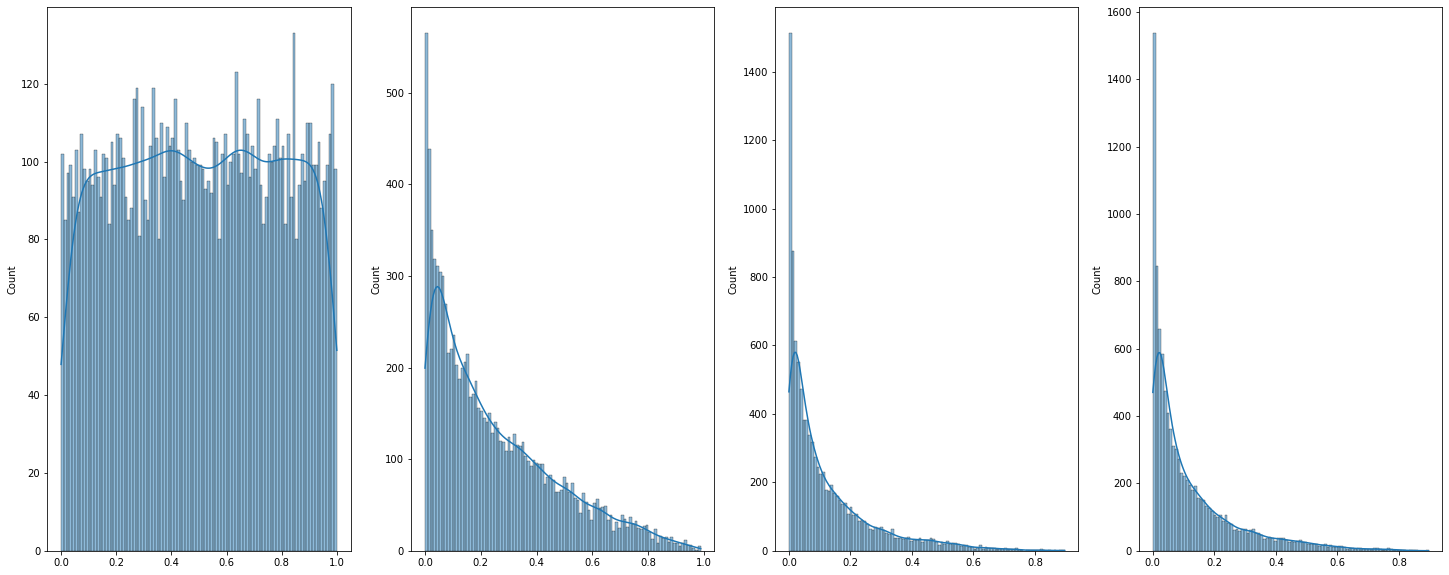

In [10]:
plt.figure(figsize=(25,10))
plt.subplot(1,4,1)
sns.histplot(arr1,bins=100, kde=True)    #by default the smooth curve will not be shown
plt.subplot(1,4,2)
sns.histplot(arr2,bins=100, kde=True)    #we have to use kde if we also want smooth curve
plt.subplot(1,4,3)
sns.histplot(arr3,bins=100, kde=True)
plt.subplot(1,4,4)
sns.histplot(arr4,bins=100, kde=True)
plt.show()

In [70]:
def get_portfolio_return(weights, returns):
    """
    Calculates the portfolio return given the weights and individual stock returns.
    """
    return np.sum(weights * returns)

def get_portfolio_volatility(weights, cov_matrix):
    """
    Calculates the portfolio volatility (risk) given the weights and covariance matrix.
    """
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

def get_portfolio_metrics(weights, returns, cov_matrix):
    """
    Calculates the portfolio return and volatility given the weights, returns, and covariance matrix.
    """
    portfolio_return = get_portfolio_return(weights, returns)
    portfolio_volatility = get_portfolio_volatility(weights, cov_matrix)
    return portfolio_return, portfolio_volatility

def generate_random_portfolios(num_portfolios, stocks):
    """
    Generates a specified number of random portfolios with different weights for each stock.
    """
    num_stocks = len(stocks.columns)
    returns = np.zeros(num_portfolios)
    volatilities = np.zeros(num_portfolios)
    weights_list = np.zeros((num_portfolios, num_stocks))
    
    for i in range(num_portfolios):
        weights = np.abs(np.random.randn(num_stocks))
        weights /= np.sum((weights)) # ensure weights sum to 1, allowing for negative weights
        
        # Calculate portfolio metrics (return and volatility)
        portfolio_return, portfolio_volatility = get_portfolio_metrics(weights, stocks.mean(), stocks.cov())
        
        # Store the results in the corresponding lists
        returns[i] = portfolio_return
        volatilities[i] = portfolio_volatility
        weights_list[i] = weights
    
    return returns, volatilities, weights_list

def optimize_portfolio(stocks, num_portfolios):
    """
    Finds the best portfolio given a set of stocks using the Monte Carlo simulation method.
    """
    returns, volatilities, weights_list = generate_random_portfolios(num_portfolios, stocks)
    portfolio_metrics = np.array([returns, volatilities]).T
    sharpe_ratios = (portfolio_metrics[:, 0] - 0.02) / portfolio_metrics[:, 1] # assume risk-free rate of 2%
    best_portfolio_index = np.argmax(sharpe_ratios)
    best_portfolio_metrics = portfolio_metrics[best_portfolio_index]
    best_portfolio_weights = weights_list[best_portfolio_index]
    #print(weights_list)
    return best_portfolio_metrics[0], best_portfolio_metrics[1], best_portfolio_weights, weights_list

# Define a list of stocks to include in the portfolio
stocks = yf.download(['AMZN', 'META', 'NFLX', 'GOOG', 'MSFT', 'TSLA', 'JNJ'], start='2016-01-01', end='2023-03-15')['Adj Close'].pct_change().dropna()

# Set the number of portfolios to simulate
num_portfolios = 100000

# Find the best portfolio using the Monte Carlo simulation method
best_portfolio_return, best_portfolio_risk, best_portfolio_weights, wl = optimize_portfolio(stocks, num_portfolios)

# Print out the best portfolio weights, expected return, and risk
print("Best portfolio weights:")
for i in range(len(stocks.columns)):
    print(f"{stocks.columns[i]}: {best_portfolio_weights[i]:.4f}")
print(f"Expected return: {best_portfolio_return:.4f}")
print(f"Risk: {best_portfolio_risk:.4f}")

[*********************100%***********************]  7 of 7 completed
Best portfolio weights:
AMZN: 0.0341
GOOG: 0.0092
JNJ: 0.1251
META: 0.0156
MSFT: 0.0449
NFLX: 0.0078
TSLA: 0.7633
Expected return: 0.0021
Risk: 0.0289


In [71]:
wl

array([[1.67108356e-02, 2.21622313e-02, 1.57683867e-01, ...,
        2.68662194e-01, 3.45625720e-02, 2.39792338e-01],
       [4.78934813e-01, 1.49415033e-02, 1.16593344e-01, ...,
        1.29171273e-01, 1.45453213e-01, 3.98162747e-02],
       [3.71769659e-04, 4.31102248e-01, 7.21664047e-02, ...,
        1.04899300e-01, 2.11483541e-01, 1.80075261e-02],
       ...,
       [5.40171649e-02, 1.85950805e-01, 4.35298418e-01, ...,
        1.02584851e-01, 4.94181473e-02, 6.59209234e-02],
       [1.21104745e-01, 1.06202112e-01, 7.91463826e-03, ...,
        1.33543497e-01, 3.31552204e-01, 2.98195610e-01],
       [2.87818971e-02, 1.44840158e-01, 1.37097468e-01, ...,
        4.88690258e-02, 2.84137900e-01, 1.44615496e-01]])

In [72]:
x1=[label[0] for label in wl]
x2=[label[1] for label in wl]
x3=[label[2] for label in wl]
x4=[label[3] for label in wl]
x5=[label[4] for label in wl]
x6=[label[5] for label in wl]
x7=[label[6] for label in wl]

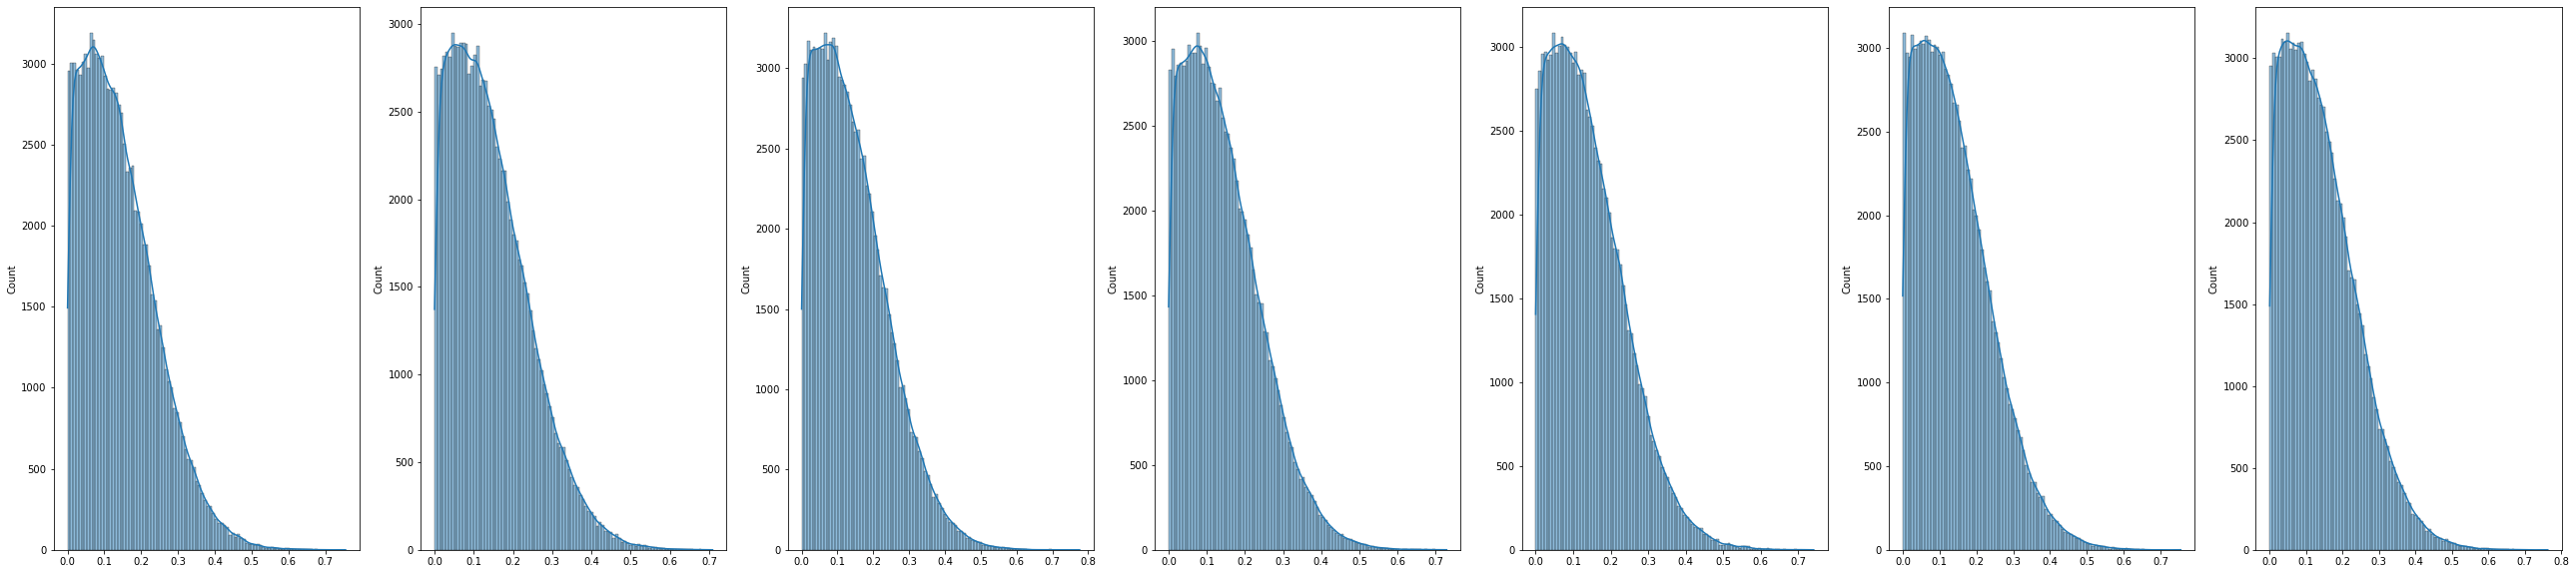

In [73]:
plt.figure(figsize=(45,10))
plt.subplot(1,7,1)
sns.histplot(x1,bins=100, kde=True)    #by default the smooth curve will not be shown
plt.subplot(1,7,2)
sns.histplot(x2,bins=100, kde=True)    #we have to use kde if we also want smooth curve
plt.subplot(1,7,3)
sns.histplot(x3,bins=100, kde=True)
plt.subplot(1,7,4)
sns.histplot(x4,bins=100, kde=True)
plt.subplot(1,7,5)
sns.histplot(x5,bins=100, kde=True)
plt.subplot(1,7,6)
sns.histplot(x6,bins=100, kde=True)
plt.subplot(1,7,7)
sns.histplot(x7,bins=100, kde=True)
plt.show()

In [74]:
print(np.mean(x1))

0.14287391030134208


In [75]:
print(np.mean(x2))

0.1430096506916764


In [76]:
print(np.mean(x3))

0.143211253273578


In [77]:
print(np.median(x3))

0.12617924702027006


In [78]:
print(np.median(x2))

0.12614702133309688


In [79]:
print(np.median(x1))

0.12628010049091454


In [80]:
wts = np.abs(np.random.randn(7))
wts

array([0.72620737, 0.92983175, 2.15744507, 0.50327382, 0.18269463,
       0.18980034, 0.12113594])

In [81]:
wts=[]
for i in range (100000):
    wt = rand.uniform(0,1000)
    wts.append(wt)
wts

[708.6102818728118,
 833.5290275230968,
 236.75895111650834,
 288.63624368919085,
 372.68072120525784,
 857.2491089155112,
 798.1313683359895,
 840.191429273838,
 440.01498783970305,
 612.0470459662072,
 469.47339741079077,
 135.51097293572124,
 507.17635980438047,
 102.65916071921566,
 962.5944164822617,
 850.734468013437,
 868.55843942215,
 798.8060862638272,
 238.06814009386767,
 40.380170711040385,
 798.7407085387933,
 608.5713311606875,
 178.218197787548,
 268.4937245786374,
 401.42544006345935,
 637.7227730004739,
 781.3566733821008,
 911.9762247903737,
 735.0890473108965,
 308.25371706738105,
 652.9307203158487,
 366.41859326070283,
 93.51728840854234,
 948.4086697448706,
 179.26821531150162,
 56.57566181317386,
 17.350798812358903,
 30.27940480589797,
 860.4465827548872,
 209.08207318467987,
 791.7030908294687,
 557.0947362188593,
 451.9474024959186,
 321.9222361957398,
 16.146556556843052,
 503.25069000621926,
 440.04765946465574,
 525.5321715736432,
 55.5012824161808,
 928.46

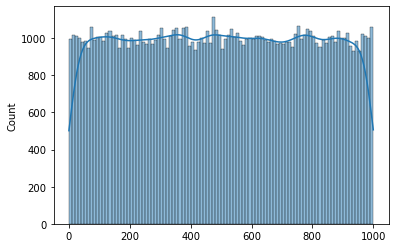

In [82]:
sns.histplot(wts,bins=100, kde=True)    #by default the smooth curve will not be shown
plt.show()

In [83]:
x=[1,2,3,4]
x /= np.sum((x))
x

array([0.1, 0.2, 0.3, 0.4])

In [84]:
stocks = yf.download(['AMZN', 'META', 'NFLX', 'GOOG', 'MSFT', 'TSLA', 'JNJ'], start='2016-01-01', end='2023-03-15')['Adj Close'].pct_change().dropna()
stocks

[*********************100%***********************]  7 of 7 completed


,AMZN,GOOG,JNJ,META,MSFT,NFLX,TSLA
Date,,,,,,,
2016-01-05,-0.005024,0.000998,0.004180,0.004989,0.004562,-0.020917,0.000090
2016-01-06,-0.001799,0.001400,-0.005054,0.002336,-0.018165,0.093071,-0.019648
2016-01-07,-0.039058,-0.023170,-0.011655,-0.049043,-0.034783,-0.026513,-0.015477
2016-01-08,-0.001464,-0.016410,-0.010683,-0.006025,0.003067,-0.027671,-0.021563
2016-01-11,0.017610,0.002183,-0.006011,0.001849,-0.000574,0.032139,-0.014929
...,...,...,...,...,...,...,...
2023-03-08,0.003955,0.005097,-0.007333,0.002493,-0.001771,0.010763,-0.030419
2023-03-09,-0.017781,-0.021025,-0.011245,-0.017733,-0.005439,-0.044934,-0.049890
2023-03-10,-0.016477,-0.017807,0.002446,-0.011999,-0.014783,-0.016858,0.003007


In [85]:
stocks.cov()

,AMZN,GOOG,JNJ,META,MSFT,NFLX,TSLA
AMZN,0.000443,0.000256,0.000064,0.000318,0.000258,0.000336,0.000320
GOOG,0.000256,0.000323,0.000079,0.000301,0.000250,0.000252,0.000262
JNJ,0.000064,0.000079,0.000140,0.000074,0.000093,0.000062,0.000055
META,0.000318,0.000301,0.000074,0.000621,0.000268,0.000343,0.000307
MSFT,0.000258,0.000250,0.000093,0.000268,0.000316,0.000250,0.000288
NFLX,0.000336,0.000252,0.000062,0.000343,0.000250,0.000796,0.000382
TSLA,0.000320,0.000262,0.000055,0.000307,0.000288,0.000382,0.001392


In [1]:
import numpy as np
from scipy.optimize import minimize

# Define the objective function to be optimized
def sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    portfolio_return = np.sum(mean_returns * weights)
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return -sharpe_ratio

# Define the constraints for the optimization problem
def constraint(weights):
    return np.sum(weights) - 1

# Define the function to perform gradient descent optimization
def optimize_portfolio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    initial_weights = np.array([1 / num_assets] * num_assets)
    bounds = ((0, 1),) * num_assets
    constraints = [{'type': 'eq', 'fun': constraint}]
    result = minimize(sharpe_ratio, initial_weights, args=(mean_returns, cov_matrix, risk_free_rate), method='SLSQP', bounds=bounds, constraints=constraints)
    return result

# Example usage of the function
mean_returns = np.array([0.1, 0.2, 0.15, 0.08])
cov_matrix = np.array([[0.04, 0.02, 0.01, 0.03],
                       [0.02, 0.09, 0.05, 0.07],
                       [0.01, 0.05, 0.06, 0.02],
                       [0.03, 0.07, 0.02, 0.12]])
risk_free_rate = 0.05
result = optimize_portfolio(mean_returns, cov_matrix, risk_free_rate)
print(result)


     fun: -0.5167106624498168
     jac: array([-0.22047706, -0.22083255, -0.22119615,  0.14872457])
 message: 'Optimization terminated successfully'
    nfev: 35
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([2.13680964e-01, 5.53418763e-01, 2.32900273e-01, 6.62447527e-17])


In [8]:
# Define the ticker symbol for Nifty 50
ticker_symbol = "^NSEI"

# Define the start and end dates for the data
start_date = "2010-03-23"
end_date = "2023-03-23"

# Retrieve the historical data using yfinance
nifty_50_data = yf.download(ticker_symbol, start=start_date, end=end_date)['Adj Close'].pct_change().dropna()

# Print the data
list(nifty_50_data)

[*********************100%***********************]  1 of 1 completed


[0.006717336606171909,
 0.004106170264094544,
 0.003947386909551209,
 -0.007618526188701069,
 -0.0025368596681716316,
 0.007887047603118758,
 0.014724487731547109,
 -0.00044704239389881106,
 0.0016119832917909083,
 -0.013061261348508935,
 0.010802213722005627,
 -0.0041124268545716935,
 -0.0031368802343442193,
 -0.009271192824555907,
 -0.0020858616118595297,
 -0.01120172428430466,
 0.0050830082363124696,
 0.0028297364125271507,
 0.004661708663224351,
 0.006594741164656526,
 0.003459606213758848,
 -0.0026491741846016437,
 -0.017500711263329638,
 0.0074202045043076925,
 0.0045392876296908025,
 -0.010467980295566504,
 -0.014216648317457281,
 -0.004583878344420755,
 -0.006643994094778005,
 -0.014300223257853517,
 0.034983768555816974,
 -0.011061728710769603,
 0.003991316528874078,
 0.004314816871684002,
 -0.01648996967581895,
 -0.0065966619527338954,
 0.001245141819076645,
 -0.028927063147710874,
 0.005681338279617032,
 -0.003324883779570742,
 0.0025958028496895214,
 -0.027751128124750002,


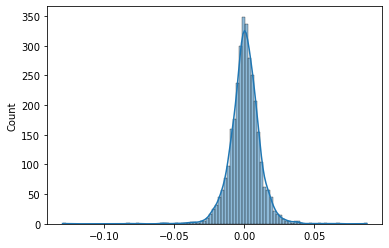

In [12]:
sns.histplot(list(nifty_50_data),bins=100, kde=True)
plt.show()